# TD1 Classification d'images

# 1. Système de classification à base de l'algorithme des kppv

## Importation des packages nécessaires

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.model_selection import train_test_split

## Lecture des données

In [6]:
#Fonction unpickle ouvre un fichier et retourne un dictionnaire
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo,encoding='bytes')
    return dict


#Fonction lecture_cifar 
def lecture_cifar(path): #chemin des fichiers comme entrée
    dict = []
    for i in range(1,6): 
       file = path + 'data_batch_'+str(i)
       dict.append(unpickle(file)) 
    X = dict[0][b'data']
    Y = dict[0][b'labels']
   
    for i in range(1,5):
        
      X = np.vstack((X,dict[i][b'data']))
      Y += dict[i][b'labels']
   
    file = path + 'test_batch'
    dict = unpickle(file)
    X = np.vstack((X,dict[b'data'])) 
    Y += dict[b'labels']
   
    X = np.float32(X)
    Y = np.asarray(Y)
    return X,Y

In [7]:
X, Y = lecture_cifar("/Users/acer/Desktop/")

In [8]:
#on travaille sur une partie de data (5000 lignes) 
X = X[:5000]
Y = Y[:5000]

In [9]:
X.shape

(5000, 3072)

In [10]:
Y.shape

(5000,)

## Decoupage des données en ensemble d'apprentissage et de test

### Création de la fonction de découpage des données

In [11]:
def decoupage_donnees(X,Y):
    
    N=np.shape(X)[0]  #N nombre de données disponibles 
    M = int(0.8*N)  #proportion d'apprentissage
    indices = np.array(range(N)) #array([    0,     1,     2, ..., 59997, 59998, 59999])
    np.random.shuffle(indices)# mélanger aléatoirement les éléments de "indices"
    
    # découpage 80% des données pour l'apprentissage, 20% pour le test
    Xtest=X[indices[:M],:]  
    Ytest=Y[indices[:M]]
    Xapp=X[indices[M:],:]
    Yapp=Y[indices[M:]]
    
    print(Xtest.shape,Ytest.shape,Xapp.shape,Yapp.shape)
    return(Xtest,Ytest,Xapp,Yapp)


Xapp,Yapp,Xtest,Ytest = decoupage_donnees(X,Y)    


(4000, 3072) (4000,) (1000, 3072) (1000,)


### Decoupage en utilisant la fonction de sklearn

In [12]:
def split_sklearn(X, Y):
    Xapp, Xtest, Yapp, Ytest = train_test_split(X, Y, test_size=0.2)
    return  Xapp, Yapp, Xtest, Ytest

#Xapps, Yapps, Xtests, Ytests=split_sklearn(X, Y)

## Calcul de la matrice des distances

In [13]:
num_app = Xapp.shape[0]
num_test = Xtest.shape[0]
def kppv_distance(Xapp, Xtest):
    dists = np.sqrt(np.sum(np.square(Xtest), axis=1)[:, np.newaxis] + np.sum(np.square(Xapp), axis=1) - 2 * np.dot(Xtest, Xapp.T))
    return dists

In [14]:
num_app

4000

In [15]:
dist = kppv_distance(Xapp, Xtest)

In [16]:
dist.shape

(1000, 4000)

In [17]:
dist[1,:10]

array([3284.5432, 3159.272 , 4839.4023, 3512.8826, 3933.2856, 3480.3608,
       3217.1914, 6145.8354, 3312.317 , 3438.3567], dtype=float32)

## Prédiction de la classe de chaque image

In [18]:
def kppv_predict(Dist,Yapp,k):
    N = Dist.shape[0]
    Ypred = np.zeros(N,dtype=int)#initialiser Ypred
    for i in range(N):
        kppv=Yapp[Dist[i,:].argsort()[:k]]#trie les éléments de Dist[i,:], indique les indices des éléments triés puis renvoie Yapp des deux premiers indices 
        Ypred[i]=np.argmax(np.bincount(kppv)) #renvoie l'indice maximal de la liste des nombres d'occurences de chaque valeur de kppv
    return Ypred 

In [19]:
Ypred = kppv_predict(dist, Yapp,1)

In [20]:
Ypred.shape

(1000,)

In [21]:
Yapp.shape

(4000,)

In [22]:
dist.shape[0]

1000

## Evaluation du classificateur

In [23]:
def evaluation_classifieur(Ytest,Ypred):
    return (Ytest==Ypred).sum()/len(Ytest)

evaluation_classifieur(Ytest,Ypred)

0.29

## Influence du nombre de voisins K sur l'efficacité du classifieur évaluée à l'aide du taux de classification (Accuracy)

In [24]:
k_choix = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100] #choix de valeurs de k
accuracy_par_classe = np.zeros(10)#initialisation du tableau accuracy_par_classe par des zeros
accuracy = np.zeros(10)
i = 0
for k in k_choix:
    Ypred = kppv_predict(dist, Yapp, k)#prediction de la classe de chaque image pour k
    accuracy[i]= evaluation_classifieur(Ytest, Ypred)#accuracy correspondante à k
    print('k=', k, "accuracy=", accuracy[i])
    i += 1 #incrémenter i 

k= 1 accuracy= 0.29
k= 3 accuracy= 0.267
k= 5 accuracy= 0.272
k= 8 accuracy= 0.295
k= 10 accuracy= 0.3
k= 12 accuracy= 0.295
k= 15 accuracy= 0.292
k= 20 accuracy= 0.284
k= 50 accuracy= 0.279
k= 100 accuracy= 0.272


In [25]:
accuracy
y_p = np.arange(len(k_choix))
y_p

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## La précision (Accuracy) en fonction de K

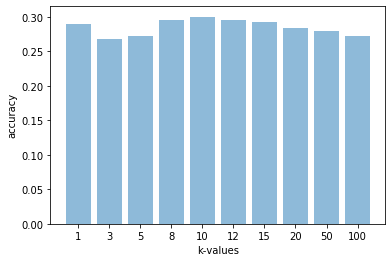

In [26]:
y_p = np.arange(len(k_choix)) #tableau de 10 éléments 
 
plt.bar(y_p, accuracy, align='center', alpha=0.5)# crée un histogramme des accuracy 
plt.xticks(y_p, k_choix)
plt.xlabel('k-values') 
plt.ylabel('accuracy') 
plt.show()

## Validation croisée

### Division du jeu d'apprentissage

In [27]:
k_choix = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
nb_div = 5 #nombre de division du jeu de données 
Xapp_div = []
Yapp_div = []
Xapp_div = np.array_split(Xapp,nb_div) #scinder les data d'apprentissage en 5 parties
Yapp_div = np.array_split(Yapp,nb_div) #scinder les labels d'apprentissage en 5 parties

### Cross validation

In [28]:
k_accuracies  = dict()
for k in k_choix:
    k_accuracies[k] = []
k_accuracies

{1: [], 3: [], 5: [], 8: [], 10: [], 12: [], 15: [], 20: [], 50: [], 100: []}

In [29]:
for k in k_choix:
    print('k=%d' % k)
    for j in range(nb_div):
        Xapp_crossval = np.vstack(Xapp_div[0:j] + Xapp_div[j+1:])
        Xtest_crossval = Xapp_div[j]

        Yapp_crossval = np.hstack(Yapp_div[0:j]+Yapp_div[j+1:])
        Ytest_crossval = Yapp_div[j]

        dists_crossval  = kppv_distance(Xapp_crossval, Xtest_crossval)
        
        Ytest_pred = kppv_predict(dists_crossval, Yapp_crossval, k) 
        num_correct = np.sum(Ytest_pred == Ytest_crossval)
        accuracy = float(num_correct) / num_test

        k_accuracies[k].append(accuracy)


k=1
k=3
k=5
k=8
k=10
k=12
k=15
k=20
k=50
k=100


In [30]:
k_accuracies

{1: [0.206, 0.231, 0.209, 0.203, 0.207],
 3: [0.211, 0.219, 0.181, 0.208, 0.193],
 5: [0.213, 0.226, 0.208, 0.223, 0.205],
 8: [0.211, 0.236, 0.214, 0.214, 0.217],
 10: [0.214, 0.219, 0.207, 0.21, 0.218],
 12: [0.229, 0.232, 0.205, 0.21, 0.204],
 15: [0.223, 0.23, 0.2, 0.206, 0.201],
 20: [0.22, 0.235, 0.197, 0.21, 0.206],
 50: [0.205, 0.238, 0.2, 0.208, 0.189],
 100: [0.204, 0.234, 0.191, 0.189, 0.187]}

In [31]:
lists = sorted(k_accuracies.items())

In [32]:
lists

[(1, [0.206, 0.231, 0.209, 0.203, 0.207]),
 (3, [0.211, 0.219, 0.181, 0.208, 0.193]),
 (5, [0.213, 0.226, 0.208, 0.223, 0.205]),
 (8, [0.211, 0.236, 0.214, 0.214, 0.217]),
 (10, [0.214, 0.219, 0.207, 0.21, 0.218]),
 (12, [0.229, 0.232, 0.205, 0.21, 0.204]),
 (15, [0.223, 0.23, 0.2, 0.206, 0.201]),
 (20, [0.22, 0.235, 0.197, 0.21, 0.206]),
 (50, [0.205, 0.238, 0.2, 0.208, 0.189]),
 (100, [0.204, 0.234, 0.191, 0.189, 0.187])]

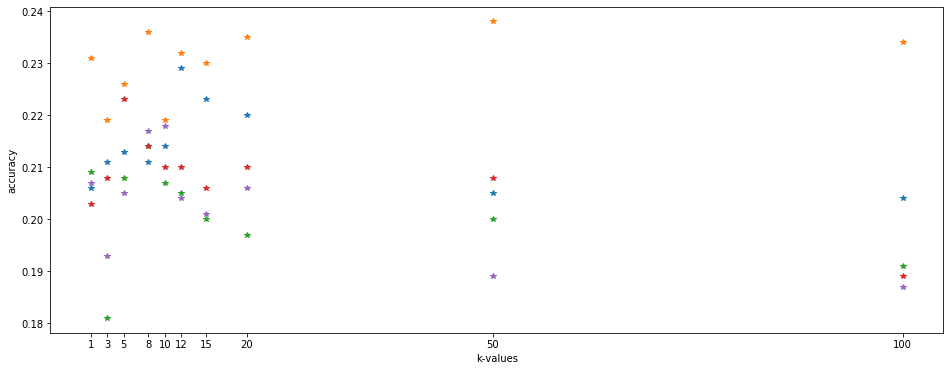

In [33]:
lists = sorted(k_accuracies.items()) #ordonner les accuracies pour chaque valeur de k 
x, y = zip(*lists) 
plt.figure(num=None, figsize=(16, 6))
plt.xticks(k_choix)
plt.xlabel('k-values')
plt.ylabel('accuracy')
plt.plot(x, y, '*')
plt.show()

## Représentation des images par le descripteur HOG en utilisant le module scikit-image

In [34]:
%matplotlib inline
from six.moves import cPickle 
import random

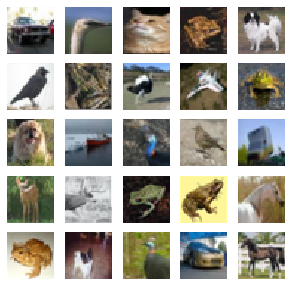

In [35]:
random.seed(1)
f = open("/Users/acer/Desktop/data_batch_1", 'rb')
data = cPickle.load(f,encoding='latin1')
f.close()
X = data["data"] 
Y = data["labels"]
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)
#Visualisation de CIFAR 10
figure, axes_1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes_1[j][k].set_axis_off()
        axes_1[j][k].imshow(X[i:i+1][0])

### Application de HOG

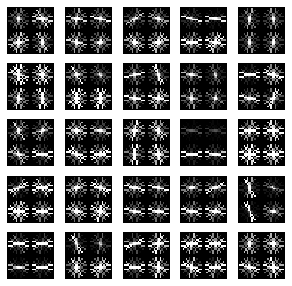

In [36]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
#Visualisation de CIFAR 10
figure, axes_1 = plt.subplots(5,5,figsize=(5,5))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes_1[j][k].set_axis_off()
        axes_1[j][k].imshow(X[i:i+1][0])
        img  = X[i:i+1][0]
        fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
        hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))
        axes_1[j][k].imshow(hog_img_rescaled, cmap=plt.cm.gray)

# 2. Système de classification à base de réseaux de neurones

## Développement du classifieur

In [37]:
import numpy as np
np.random.seed(1) # pour que l'exécution soit déterministe

########################## 
# Génération des données # 
##########################

# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie) 

def classifieur_RN(nb_it = 1000000,lr = 0.1): #nb_it est le nombre d'itération, lr est le learning rate
    N, D_in, D_h, D_out = 30, 2, 10, 3
    # Création d'une matrice d'entrée X et de sortie Y avec des valeurs aléatoires 
    X = np.random.random((N, D_in))
    Y = np.random.random((N, D_out))
    # Initialisation aléatoire des poids du réseau 
    W1 = 2 * np.random.random((D_in, D_h)) - 1
    b1 = np.zeros((1,D_h))
    W2 = 2 * np.random.random((D_h, D_out)) - 1 
    b2 = np.zeros((1,D_out))
    pertes=[]
    for i in range(nb_it):

        ####################################################
        # Passe avant : calcul de la sortie prédite Y_pred # 
        ####################################################
        I1 = X.dot(W1) + b1 # Potentiel d'entrée de la couche cachée
        O1 = 1/(1+np.exp(-I1)) # Sortie de la couche cachée (fonction d'activation de type sigmoïde) 
        I2 = O1.dot(W2) + b2 # Potentiel d'entrée de la couche de sortie
        O2 = 1/(1+np.exp(-I2)) # Sortie de la couche de sortie (fonction d'activation de type sigmoïde)
        Y_pred = O2 # Les valeurs prédites sont les sorties de la couche de sortie
        ######################################################## 
        # Calcul et affichage de la fonction perte de type MSE # 
        ######################################################## 
        loss = np.square(Y_pred - Y).sum() / 2
        pertes.append(loss)
        if i % 1000 == 0:
            print(loss)

        ####################################################
        # Backpropagation (Descente du gradient )#
        ####################################################
        O2_D=O2*(O2-Y)*(1-O2)
        O1_err=O2_D.dot(W2.T)
        O1_D=O1_err*(1-O1)*O1
        dW1=X.T.dot(O1_D)
        dW2=O1.T.dot(O2_D)
        db1=np.sum(O1_D,axis=0,keepdims=True)
        db2=np.sum(O2_D,axis=0,keepdims=True)

        W1 -=lr*dW1
        W2 -=lr*dW2
        b1 -=lr*db1
        b2 -=lr*db2
        

In [38]:
classifieur_RN(nb_it = 1000000,lr = 0.1)

4.668071349518289
3.5958396817499283
3.5266464222368907
3.44243484501911
3.328705944988865
3.1771958319559888
2.877850395786176
2.5423764147296595
2.3223137008123413
2.145897408568035
2.0075661426769478
1.909205028940317
1.832677743433213
1.7650734764549338
1.7045317741463768
1.6537744438458866
1.611828730462142
1.575658375575651
1.542536369830097
1.510672309166201
1.4792019292106293
1.4480423403021763
1.4176271508006884
1.3883427930329764
1.360016325903545
1.3319290291462402
1.3032289856159338
1.273218641799066
1.24143082417478
1.2078756441278558
1.1732499271219428
1.138695256814767
1.1054023471960563
1.074367248146461
1.0462263281918065
1.0211821590111985
0.9990812008510037
0.9795811622248589
0.9622954148019917
0.9468648116314664
0.932975209428873
0.9203550305068647
0.9087712135350767
0.8980263145798763
0.8879541623620196
0.878411239005427
0.8692585220542196
0.8603083593229611
0.8510405732318604
0.8396631725734726
0.8309956215471516
0.8258801735899515
0.8568004420411367
0.85712586368

0.4262162372844861
0.4261159931208031
0.42601659711598244
0.4259180399979913
0.42582031252876573
0.4257234055055571
0.42562730976224944
0.42553201617071795
0.42543751564215976
0.4253437991283829
0.42525085762320763
0.42515868216372843
0.42506726383168686
0.42497659375476077
0.42488666310788875
0.4247974631145779
0.42470898504819005
0.4246212202332757
0.42453416004677713
0.4244477959193668
0.4243621193366577
0.42427712184047706
0.4241927950300579
0.4241091305632629
0.42402612015776864
0.42394375559221964
0.4238620287074121
0.4237809314073649
0.42370045566044234
0.42362059350042464
0.42354133702753227
0.42346267840947693
0.4233846098823745
0.4233071237517751
0.4232302123935001
0.423153868254579
0.42307808385407647
0.4230028517838818
0.42292816470947076
0.422854015370699
0.4227803965823883
0.42270730123504846
0.42263472229543225
0.4225626528071358
0.42249108589107154
0.4224200147459544
0.42234943264873315
0.42227933295494985
0.4222097090990853
0.42214055459483607
0.42207186303534305
0.422

0.4020581734931297
0.4019697411069259
0.4018808793525904
0.40179158691689265
0.40170186253797613
0.40161170500741517
0.40152111317225303
0.40143008593714635
0.40133862226652983
0.4012467211868015
0.4011543817885641
0.4010616032289672
0.400968384733962
0.40087472560074716
0.4007806252001334
0.4006860829790095
0.40059109846286645
0.40049567125828484
0.4003998010555132
0.40030348763109647
0.40020673085047515
0.40010953067067906
0.4000118871430221
0.39991380041579505
0.3998152707370787
0.39971629845743134
0.39961688403278556
0.3995170280271806
0.3994167311156019
0.3993159940868778
0.39921481784643864
0.39911320341924006
0.39901115195258274
0.3989086647189534
0.3988057431188847
0.3987023886837753
0.39859860307868666
0.3984943881051631
0.3983897457039545
0.39828467795776484
0.3981791870939269
0.3980732754870475
0.39796694566158963
0.39786020029441893
0.3977530422172489
0.39764547441903886
0.39753750004831995
0.39742912241537814
0.3973203449944316
0.3972111714256284
0.3971016055169696
0.39699

## Développement du classifieur adapté à la BD CIFAR

In [39]:
nb_it=1000 #nb_it est le nombre d'itération
lr=0.5
D_h=10
def classifieur_RN_cifar(X,Y,Ytest,D_h,lr,nb_it):
    D_in = X.shape[1]
    D_out = X.shape[0]

    # Initialisation aléatoire des poids du réseau 
    W1 = 2 * np.random.random((D_in, D_h)) - 1
    b1 = np.zeros((1,D_h))
    W2 = 2 * np.random.random((D_h, D_out)) - 1 
    b2 = np.zeros((1,D_out))
    distionnaire= {}
    liste=[] 
    for i in range(nb_it):

        ####################################################
        # Passe avant : calcul de la sortie prédite Y_pred # 
        ####################################################
        I1 = X.dot(W1) + b1 # Potentiel d'entrée de la couche cachée
        O1 = 1/(1+np.exp(-I1)) # Sortie de la couche cachée (fonction d'activation de type sigmoïde) 
        I2 = O1.dot(W2) + b2 # Potentiel d'entrée de la couche de sortie
        O2 = 1/(1+np.exp(-I2)) # Sortie de la couche de sortie (fonction d'activation de type sigmoïde)
        Y_pred = O2 # Les valeurs prédites sont les sorties de la couche de sortie
        ######################################################## 
        # Calcul et affichage de la fonction perte de type MSE # 
        ######################################################## 
        loss = np.square(Y_pred - Y).sum() / 2
        if i % 100 == 0:
            distionnaire['pourcentage de perte à l itération',i] = loss
            liste.append(np.sum(Ytest==Y_pred)/len(Ytest))

        ####################################################
        # Backpropagation (Descente du gradient )#
        ####################################################
        O2_D=O2*(O2-Y)*(1-O2)  #on applique la dérivée de la fonction sigmoid à l'erreur
        O1_err=O2_D.dot(W2.T) 
        O1_D=O1_err*(1-O1)*O1
        dW1=X.T.dot(O1_D) # ajustement du premier ensemble des poids (input to hidden)
        dW2=O1.T.dot(O2_D) # ajustement du deuxième ensemble des poids (hidden to output)
        db1=np.sum(O1_D,axis=0,keepdims=True)
        db2=np.sum(O2_D,axis=0,keepdims=True)

        W1 -=lr*dW1
        W2 -=lr*dW2
        b1 -=lr*db1
        b2 -=lr*db2
    return (dictionnaire)

In [40]:
def perte(X,y=None,reg=0.8):
    s=0.01
    dim_entree=X.shape[1]
    dim_cache=np.max(Y)+1
    dim_sortie=10 #10 classes en sortie
    W1, b1=s*np.random.randn(dim_entree,dim_cache),np.zeros(dim_cache)
    W2, b2=s*np.random.randn(dim_cache,dim_sortie),np.zeros(dim_sortie)
    N,D=X.shape    
    #calcul de la partie Passe avant (forward pass)
    score=None
    h1=(X.dot(W1)+b1).clip(min=0) #attribue 0 aux valeurs négatives
    score=h1.dot(W2)+b2
    
    if y is None: 
        return score
    
    #calcul de pertes
    perte=None
    score -= np.max(score)
    p=np.exp(score) / np.sum(np.exp(score),axis=1)[:,np.newaxis]
    perte= -np.sum(np.log(p[range(N),y]))
    perte /= N
    perte += reg * (np.sum(W1*W1) + np.sum(W2*W2))
    
    gradiens= {}
    d_score=p
    d_score[range(N),y] -= 1 
    d_score /= N
    gradiens['W2'] = h1.T.dot(d_score)
    gradiens['W2'] += reg * W2
    
    dh1=d_score.dot(W2.T)
    dh1[h1==0]=0 
    gradiens['W1']=X.T.dot(dh1)
    gradiens['W1'] += reg*W1
    
    gradiens['b2']=np.sum(d_score,axis=0)
    gradiens['b1']=np.sum(dh1,axis=0)
    
    return perte, gradiens
    

In [41]:
perte(Xapp,Yapp)

(6.350535930363437,
 {'W2': array([[-4.33462853e+00, -5.79284296e+00, -5.52879841e+00,
          -3.51172468e+00,  8.80567022e-01, -1.52605901e+00,
          -4.87852840e+00, -4.62539358e+00, -4.30156772e+00,
           3.36243521e+01],
         [ 2.86699095e-03, -1.57149463e-01, -6.85080661e-02,
          -5.48910451e-02,  9.64429944e-03, -1.53798625e-01,
          -2.00374590e-01,  1.42174427e-02,  1.21451105e-03,
           6.13941487e-01],
         [-5.58062297e+00, -7.17969748e+00, -6.10782545e+00,
          -5.23800536e+00, -1.04672486e-01, -3.16715858e+00,
          -5.34266034e+00, -4.76226481e+00, -7.87146340e+00,
           4.53492450e+01],
         [-2.56113495e-01, -7.07946506e-01, -1.32760982e-01,
           1.89910820e-01,  1.05623553e-01,  7.09519877e-02,
           1.06147517e-01, -2.97416376e-01, -5.40924727e-01,
           1.43761232e+00],
         [-1.71862078e+00, -1.61968085e+00, -1.83729612e+00,
          -1.52250911e+00, -8.12159986e-02, -1.27820368e+00,
        

In [42]:
def predict(X):
    Y_pred=None
    s=0.01
    dim_entree=X.shape[1]
    dim_cache=np.max(Y)+1
    dim_sortie=10 #10 classes en sortie
    W1, b1=s*np.random.randn(dim_entree,dim_cache),np.zeros(dim_cache)
    W2, b2=s*np.random.randn(dim_cache,dim_sortie),np.zeros(dim_sortie)
    N,D=X.shape   
    
    h1=(X.dot(W1)+b1).clip(min=0) #attribue 0 aux valeurs négatives
    score=h1.dot(W2)+b2
    Y_pred=np.argmax(score,axis=1)
    
    return(Y_pred)
    

In [62]:
from past.builtins import xrange

def train(X,y,X_val,y_val,learning_rate=0.01,learning_rate_dec=0.95,reg=5e-6,num_iters=1000,batch_size=1000,z=False):
    num_train= X.shape[0]
    iterations_per_epoch=max(num_train/batch_size,1)
    # descente du gradient stochastique pour optimiser les paramètres contenues dans le modèle
    loss_his=[]
    train_acc_his=[]
    val_acc_his=[]
    s=0.01
    dim_entree=X.shape[1]
    dim_cachee=np.max(y)+1
    dim_sortie=10
    param= {}
    param['W1']=s*np.random.randn(dim_entree,dim_cachee)
    param['b1']=np.zeros(dim_cachee)
    param['W2']=s*np.random.randn(dim_cachee,dim_sortie)
    param['b2']=np.zeros(dim_sortie)
    
    for it in xrange(num_iters):
        x_batch=None 
        y_batch=None
        #mini batch aléatoire pour entraîner les données et les labels
        idx=np.random.choice(num_train,batch_size)
        x_batch=X[idx]
        y_batch=y[idx]
        #calcul la loss et les gradients en utilisant le minibatch actuel
        loss_,gradiens=perte(x_batch,y=y_batch,reg=reg)
        loss_his.append(loss_)
        for param_name in param:
            param[param_name] -= learning_rate*gradiens[param_name]
            
        if z and it % 100 ==0:
            print('iteration %d / %d:loss %f' % (it,num_iters,perte))
        #on vérifie pour chaque epoch, l'entrainement, val accuracy et le decay lr    
        if it % iterations_per_epoch == 0:
            #vérifie l'accuracy
            train_acc=(predict(x_batch)==y_batch).mean()
            val_acc=(predict(X_val)==y_val).mean()
            train_acc_his.append(train_acc)
            val_acc_his.append(val_acc)
            #decay lr
            learning_rate *= learning_rate_dec
            
    return{
        'loss_history':loss_his,
        'train_acc_history' : train_acc_his,
        'val_acc_history': val_acc_his,
    }
        
        
        
        
        
        
        


In [66]:
Res=train(Xapp,Yapp,Xtest,Ytest,learning_rate=0.01,learning_rate_dec=0.95,reg=5e-6,num_iters=1000,batch_size=200,z=False)

In [67]:
Res

{'loss_history': [3.977420850129934,
  9.368310886361542,
  2.8669519156869794,
  3.2096953787821922,
  2.605867514170973,
  3.412283714568895,
  5.462174294616833,
  3.2000221298913782,
  2.7730963847976304,
  3.4785281872612597,
  2.7880383312302066,
  3.702175009906318,
  2.937099154914955,
  4.800322745115066,
  4.389544784174069,
  2.6747477381375386,
  2.361648885156526,
  3.3086728875218965,
  4.4520548244374005,
  2.7109727324742727,
  2.9736394673546496,
  2.816487367880134,
  3.0390149229336374,
  2.797394422239117,
  3.003915426209861,
  2.8883714605858573,
  2.485838431912675,
  2.667723120150952,
  3.3585967637886136,
  4.008672892804693,
  2.6827647351612516,
  2.7637590458624035,
  2.805828934949315,
  3.3885731089035707,
  3.4807837055012962,
  3.9254920493867798,
  2.6755095627881853,
  2.76867558007764,
  2.4159472146133365,
  3.2663959148475583,
  5.051399047206493,
  3.084993935664371,
  3.7558179901672823,
  2.8825005969026933,
  2.606513345038144,
  2.444536960041

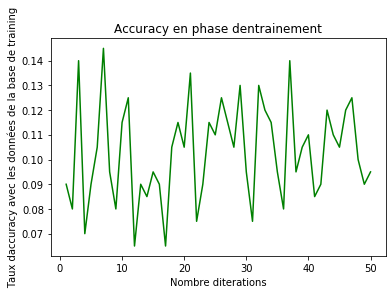

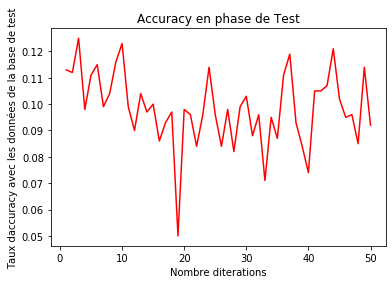

In [69]:
plt.plot([i for i in range(1,len(Res['train_acc_history'])+1)],Res['train_acc_history'],'g')
plt.xlabel('Nombre d''iterations')
plt.ylabel('Taux d''accuracy avec les données de la base de training')
plt.title('Accuracy en phase d''entrainement')
plt.show()


plt.plot([i for i in range(1,len(Res['train_acc_history'])+1)],Res['val_acc_history'],'r')
plt.xlabel('Nombre d''iterations')
plt.ylabel('Taux d''accuracy avec les données de la base de test')
plt.title('Accuracy en phase de Test')
plt.show()